# An Analysis of Covid Deaths Based on Temperature and Political Affiliation
## Name: Sarathy Kanathasan | Utorid: kanatha3

***


### Introduction
There have been studies that have linked differences in climate at a global level to the spead ad deaths caused by corona (Mecenas et. al, 2020). I was very intrested in seeing if such a link between a metric of climate and a metric for deaths/spread could be established at a state level. In this paper I go further to investigate the link between climate and Corona Virus deaths, building on findings and plots from project 1. In the first project I looked at the link between corona virus deaths per state(total) and latitude,  aswell as corona deaths and a metric for govenment intervention (testing rate), with the data available from the original dataset provided. It was evident however that these variables provided weak relationships and little proof of a causal relationship. For part 2 i combined the provided data set with US national weather datasets, US census population datasets, and US election data sets to get variables that better control for confounding variables and therefore have greater interpritability and gereralization implications. Particularly for part 2, I now test and map the variables of intrest: death rate per 100,000 (dependant variable now controlled for the confounding variable of population size), temperature (main independant variable replacing latitude as a more accurate reprisentation of state climate), and finally state political affiliation (whether the state was a red state or blue state as a more accurate representation of goverenment intervention). Below are the updated graphs/maps as well as their interpretations and implications for further study  
***
___


# Project 1

### Data sources



The source of the data is the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. In particular I would be analyzing the Daily US cases on December 31st 2020. 


### Question
This Project will attempt to find causative variables for deaths in US States. In particular This project attempts to see __if  state average Temprature and testing rate have an effect on the number of deaths per 100,000 people a state faced on December 31st 2020.__ The reason these variables were chosen in particular is that they are decent indicators of two factors. I chose temprature as there have been studies that have attempted to link climate to spead of corona (Mecenas et. al, 2020) , I would love to see if temprature has and effect on the number of covid deaths at a state level. The second factor I would like to see is testing rate. Testing for covid is different from state to state, so i would also be intrested in seeing if the rate at which testing occured had any effects on the number of deaths per 100,00 in the reigon. The reason we use death rate/100,000 instead of total deaths is so we can control for population as a confounding variable.This requires us to merge state average temprature data and state population data to the dataset.  __In summation the outcome variable (Y) is number of Covid deaths / 100,000 in USA on December 31st 2020 and the X variables are: 1.The mean temprature in the state the death occured in  and, 2. The testing rate that the state was at.__

___

### Data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dat = pd.read_csv('12-31-2020.csv') #import dataframe
dat.head()
dat2 = pd.read_csv("USTemprature_data.csv") #add us Temprature DATA
dat3 = pd.read_csv("State_pop.csv")

#create subset of data with relavent attributes
df = dat[["Province_State","Lat", "Testing_Rate", "Deaths" ]]
df = pd.merge(df, dat2, left_on="Province_State", right_on="State") #MERGE TEMPRATURE DATA

df = pd.merge(df, dat3, left_on="Province_State", right_on="State")  #merge pop data

df = df[["Province_State", "Testing_Rate", "Deaths","Avg ° C", "Pop Estimate" ]] #extract relevant columns
df = pd.DataFrame(df) #idk if this is necessary but it said to do so in assignment

df = df.dropna() #clean up dataset by removing null values
df.dtypes
#create deathrate per 100,000 column (variable of intrest)
df["deaths/100,000"] = (df["Deaths"]/df["Pop Estimate"]) * 100000

print(df.describe()) #print summary stats


        Testing_Rate        Deaths    Avg ° C  Pop Estimate  deaths/100,000
count      50.000000     50.000000  50.000000  5.000000e+01       50.000000
mean    79902.727516   7008.880000   0.132000  6.551896e+06      101.994071
std     35820.895397   8092.153462   6.850099  7.389343e+06       47.273616
min     30400.013430    136.000000 -16.300000  5.787590e+05       20.340822
25%     57850.147436   1479.750000  -4.525000  1.827712e+06       67.990007
50%     75015.835658   4800.500000   0.000000  4.558234e+06       97.976928
75%     91557.771816   8520.000000   3.900000  7.530849e+06      124.381126
max    186385.755186  37983.000000  19.700000  3.951222e+07      214.384065


The data is taken from corona virus database aswell as US weather and census databases. From this summary statistics we get a few key things. We can see that both deaths and testing rate are very spead with large standard deviations and death rate per 100,000 also varys quite a bit. This means there are large differences at the state level which hopefully can be explained using our _y_ variables We see that mean termprature is around 0 with temprature varying from around +-20 degrees, so state differed in terms of temprature aswell.  

---



### Plots
#### Histograms

Text(0, 1, '(Fig.3)                         Mean Temperature (Celsius)')

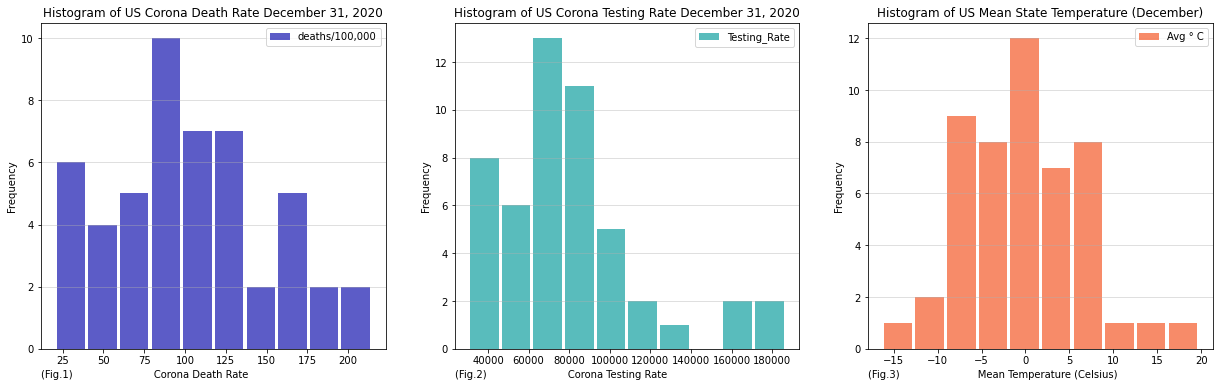

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(21, 6))

df.plot(kind="hist",
        y ="deaths/100,000",
        color='#0504aa',
        title = "Histogram of US Corona Death Rate December 31, 2020",
        alpha=0.65,
        rwidth=0.9,
        ax = ax[0]).grid(axis='y', alpha=0.5)

df.plot(kind="hist",
        y ="Testing_Rate",
        color='#009999',
        title = "Histogram of US Corona Testing Rate December 31, 2020",
        alpha=0.65,
        rwidth=0.9,
        ax = ax[1]).grid(axis='y', alpha=0.5)

df.plot(kind="hist",
        y ="Avg ° C",
        color=(244/255, 77/255, 24/255),
        title = "Histogram of US Mean State Temperature (December)",
        alpha=0.65,
        rwidth=0.9,
        ax = ax[2]).grid(axis='y', alpha=0.5)

ax[0].set_xlabel('(Fig.1)                          Corona Death Rate', position=(0, 1),horizontalalignment='left')
ax[1].set_xlabel('(Fig.2)                          Corona Testing Rate', position=(0, 1),horizontalalignment='left')
ax[2].set_xlabel('(Fig.3)                         Mean Temperature (Celsius)', position=(0, 1),horizontalalignment='left')

The above graphs are histograms of the death rate/100,000 per state, The Corona Testing rate per state and the Mean state tepratures in December. From Fig.1 it is evident that deaths per 100,000 are almost normally distributed about a mean of 100. This is intresting as it shows that most states had between 75 to 125 deaths/100,000. We want to see if temprature and testing rate had any effect on the states with an increase in deaths. When we look at The histogram of testing rates (Fig.2) it is apperent that the states are more right skewed, with most states having a testing rate of about 60,000 to 80,000. Finally we see mean state temperature, which amost normally distributed about a mean of 0. Ideally we would like to see if variation of death rates at the state level could be better explained using the vatiation in temperatures and testing rates. 


#### Scatter plots

Text(0, 1, '(Fig.4)                                              State Temp (C)')

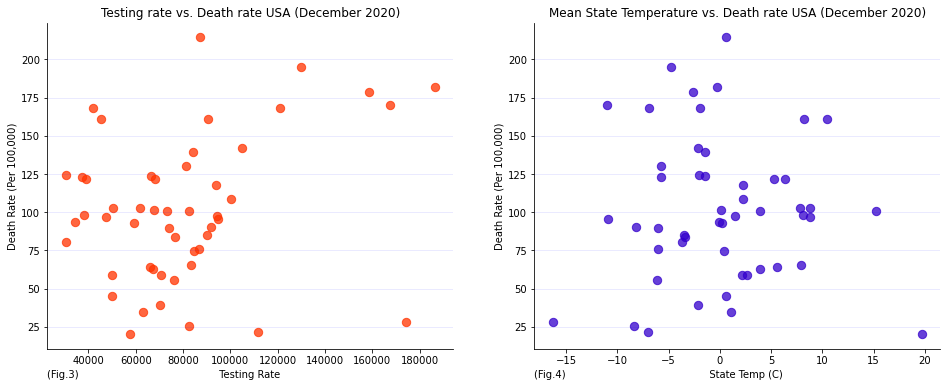

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

df.plot.scatter(x = "Testing_Rate",
                y = "deaths/100,000",
                s = 70,
                title = "Testing rate vs. Death rate USA (December 2020)",
                xlabel = "Testing Rate",
                ylabel = "Death Rate (Per 100,000)",
                alpha=0.75,
                color='#FF3300',
                ax = ax[0]).grid(axis='y',color = "b", alpha=0.1)


df.plot.scatter(x = "Avg ° C",
                y = "deaths/100,000",
                s = 70,
                title = "Mean State Temperature vs. Death rate USA (December 2020)",
                xlabel = "Testing Rate",
                ylabel = "Death Rate (Per 100,000)",
                alpha=0.75,
                color='#3300CC',
                ax = ax[1]).grid(axis='y',color = "b", alpha=0.1)

ax[0].set_xlabel('(Fig.3)                                             Testing Rate',
                 position=(0, 1),horizontalalignment='left')
ax[1].set_xlabel('(Fig.4)                                              State Temp (C)', position=(0, 1),horizontalalignment='left')

The scatter plots seen in fig.4 and Fig.3; plot the relationships between temprature/testing rate and death rate. There seems to be  a positive relation between deaths and testing rate (Fig.3) . Suprisingly the states with the highest testing rates have among the highest death rates  per 100,000 (See Fig.4). When we look at the Temperatures effect on corona virus death rate, at first glance there apears to be no (or atleast a very weak), relationship between death rate and temperature. There may be a confounding variable that may be making be captured in this relationship. Both relationships merit further investigation. 


***
***
### Project 1  Thoughts
The data i was presented did not have much variables that i would truely like to analyze, instead i was forced to used latitude and testing rate as proxies for the real variables i would liked to have tested. __2 X's which would have better explained Y (deaths) may be population density (the confounding variable i found from graph 5) and States average temprature (the true variable i wanted to test for).__ For further analysis i would like to merge those data sets. The weak correlation found between testing rates and deaths may be indicative that this may not be a good X variable (or multivariable regression may be needed). 

____
***

# PROJECT 2
### Introduction
This project adds on to the previous but also adress issues of confounding variables. In particular corona virus deaths is an arbitrary metric as it doesnt consider variations in state populations. By merging the dataset with poluation metric we create a y variable that is more important (death rate per 100). Once we got this metric we attempt to see if temperature and poitical affiliation have any relation to deathrate by mapping them out and looking for simmilarities.


### THE MESSAGE


__The paper attempts to see if there is a relationship between temprature and corona virus death rates (per 100,000) at the state level in december.__ Based on the preliminary visualization from project 1, there doesnt seem to be any clear linear relation. Therefore for further analysis, I would likely need to control for possible confounding variables on the outcome variable (ie. Seperating between red and blue states or between high density states and low density states). 

### A Geographic analysis of the variables of intrest

In [42]:
import geopandas as gpd

from shapely.geometry import Point
import matplotlib.patches as mpatches


%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();
s_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

(-130.0, -65.0, 20.0, 50.0)

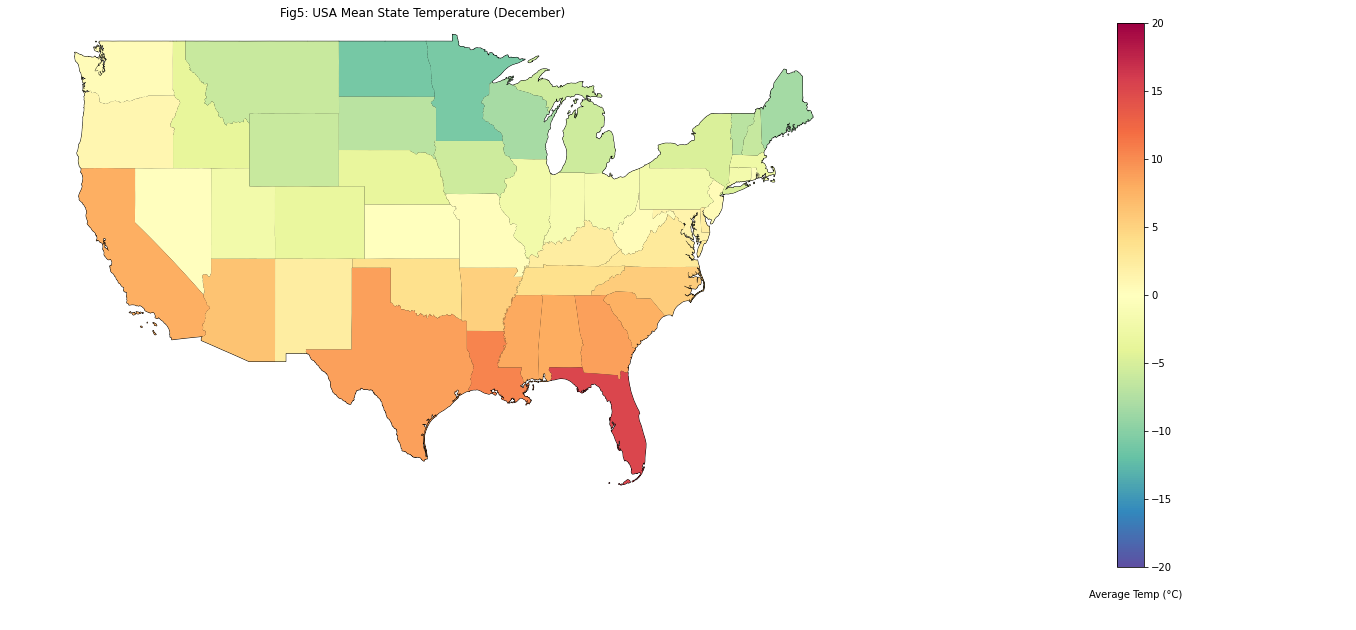

In [43]:
#plot map of USA
fig, gax = plt.subplots(figsize=(100, 10))
s_df.plot(ax=gax, edgecolor='black', color='white')

#scale to better fit map
gax.set_xlim(-130, -65)
gax.set_ylim(20, 50)

#label map
gax.set_title('Fig5: USA Mean State Temperature (December)')


#merge data to geo data
s_df
state_df = s_df.merge(df, left_on="NAME", right_on="Province_State", how="inner")
state_df.head()

state_df.plot(
    ax=gax, column='Avg ° C', legend=True, cmap='Spectral_r',
    vmin=-20, vmax=20 
)
gax.annotate('Average Temp (°C)',xy=(0.803, 0.05),  xycoords='figure fraction')


plt.axis('off')

(-130.0, -65.0, 20.0, 50.0)

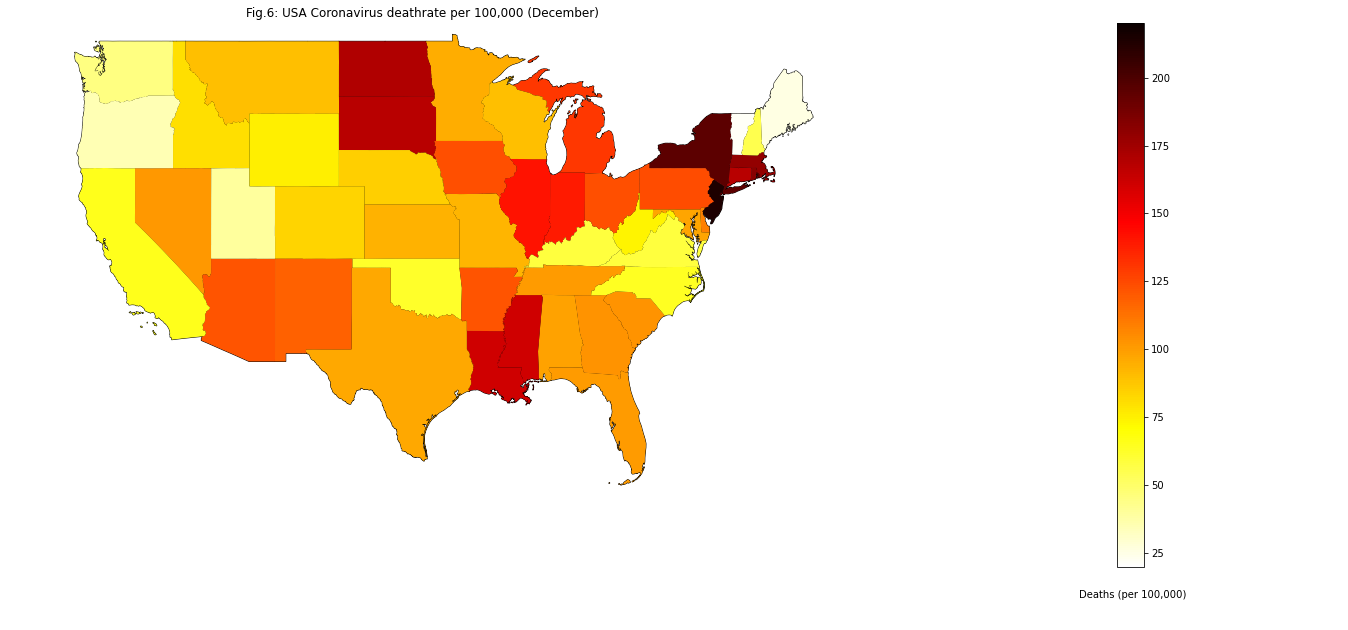

In [44]:
#plot map of USA
fig, gax = plt.subplots(figsize=(100, 10))
s_df.plot(ax=gax, edgecolor='black', color='white')

#scale to better fit map
gax.set_xlim(-130, -65)
gax.set_ylim(20, 50)

#label map
gax.set_title('Fig.6: USA Coronavirus deathrate per 100,000 (December)')

p = state_df.plot(ax=gax, column='deaths/100,000', legend=True, cmap='hot_r',
              vmin=20, vmax=220 )

gax.annotate('Deaths (per 100,000)',xy=(0.80, 0.05),  xycoords='figure fraction')
plt.axis('off')




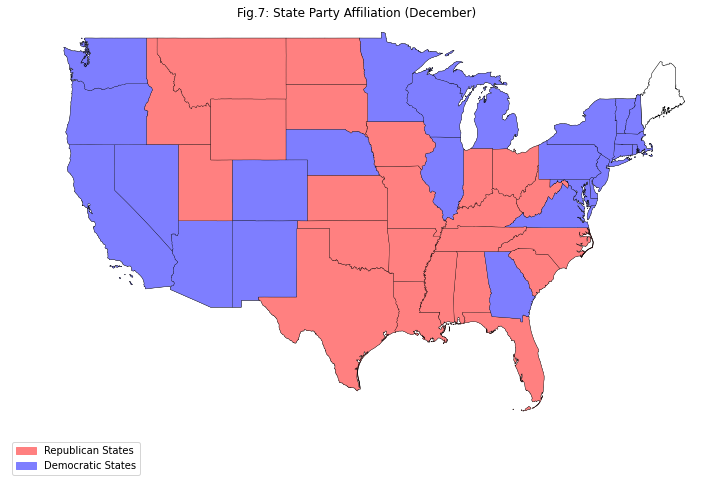

In [45]:
color = pd.read_csv('state_affiliation.csv') #import state affiliation dataset
red_patch = mpatches.Patch(color= (255/255,128/255,128/255,255/255), label='Republican States')
blue_patch = mpatches.Patch(color= (126/255,126/255,255/255,255/255), label='Democratic States')

# #merge color data to main dataset
st_df = s_df.merge(color, left_on="STUSPS", right_on="State")

# #plot map of USA
fig, gax = plt.subplots(figsize=(10, 14))
s_df.plot(ax=gax, edgecolor='black',lw = .5, color = 'white', )

#scale to better fit map
gax.set_xlim(-130, -65)
gax.set_ylim(20, 50)

#label map
gax.set_title('Fig.7: State Party Affiliation (December)')

p = st_df.plot(ax=gax,edgecolor='black',lw= 0.25, column='coded', cmap='bwr_r',
                vmin=-.5, vmax=1.5).legend(handles=[red_patch,blue_patch], loc = 'lower left')

plt.axis('off')
plt.tight_layout()
plt.show()

The following graphs map out important information from variables of intrest. The temprature map shows us the mean average state temperatures geographically or our independant variable of intrest (See __Fig.5__). This variable is a much better metric to latitude (From project 1) as it distiguishes between states who share a common or very simmilar latitude but have different climactic conditions. The second map (__Fig.6__), shows us a graphical map of deaths per 100,000. In doing so we are able to see clusters of states with very simmilar death rate. This could be indicative that climate may have something to do with death rate, but may also be indicative of another confounding varible. At first glance, the death rate "clusters' seemed simmilar to clusters of states' poltical affiliation (majority republican or majority Democratic). Therefore for the final map (__Fig.7__), is a map of state political affiliaction (fromthe 2020 election results).  These maps show that tempreatures and political affiliation of states may be good indicators of the corona virus death rate (it may be important to control political affiliation as a confounding variable for further analyisis). 

### CONCLUSION

Though the scatter plots it appears that there is a relationship between testing rate and deaths/100,000 people, however the relationship is not as clear for temperature and death rate. When mapped, there seems to be evidenece states with simmilar death rates being clustered together, this could be indicative of a relationship between climate and spread or simply another confounding variable (political affiliation ect). When compared to the map of state political affiliations, clusters seem to follow a simmilar shape. Therefore though there is no clear linear relationship between temperature and covid death rate, we would likely need to run a multiple regression to control for counfounding variables to be able to state conclusively that no clear relationship exists between temperature and covid deaths/100,000 at the state level. 

___

# Project 3


### Introduction
This project works to further delve into possible links between state level climate/political metrics and the corona virus death rate on December 30 2020. Since Temperture showed promise as an explanatory variable, we attempted to see a link between percipitation and deathrate. Precipitation data was accumulated using webscraping techniques. Building on the political side of the relationship this project goes further to find a link by merging a data set of percentage of population uninsured per state. This dataset will allow us to see if uninsured percentage has an effect on covid death rate. 

### Web Scrapping Oppurtunities
The main focus of this paper is to see if climate conditions and political factors have an effect on the covid-19 deathrate at a state level. Since a state mean monthly tempertatures are available in pre-existing datasets webscapping i had already added it to the data saving time and resources. Instead, if i were to webscrape, i would scrape  percipitation averages in december of the capital of each state. I believe this data enhances the paper as it provides another dimension to the climate variable we want to test. The hypothisis being, higher precipitation in major cities would lead to less super spreader events. I specifically chose the capitals' percipitation over the states' as states vary greatly in size and super speader events would likely take place in metropolitan areas and major cities. The adress I would be scrapping this data from is https://www.currentresults.com/Weather/US/average-state-precipitation-in-winter.php. I can take convert the first column to a string and extract the value of the state. Once i do this i can merge data with my dataset on states. Once merged i could graph the effects on death rate or run a multiple regression to see if these climatary conditions have and effect on death rates. Since data is averaged percipitation in winter over years, i simply need to run the program once to scrap winter percipitation for each states capital. From a technical aspect, I would be able to webscrape this information; a quick inspect element reveals the datatables are well organized. The only issue I would have is that the professor did mention it is not always legal to webscape, so from a legal standpoint i am unsure if i would be able to srape and publish this information. In the future i would need to know if it is legal to webscrape from this website. 

___
### Webscraped Data/Plots

(-130.0, -65.0, 20.0, 50.0)

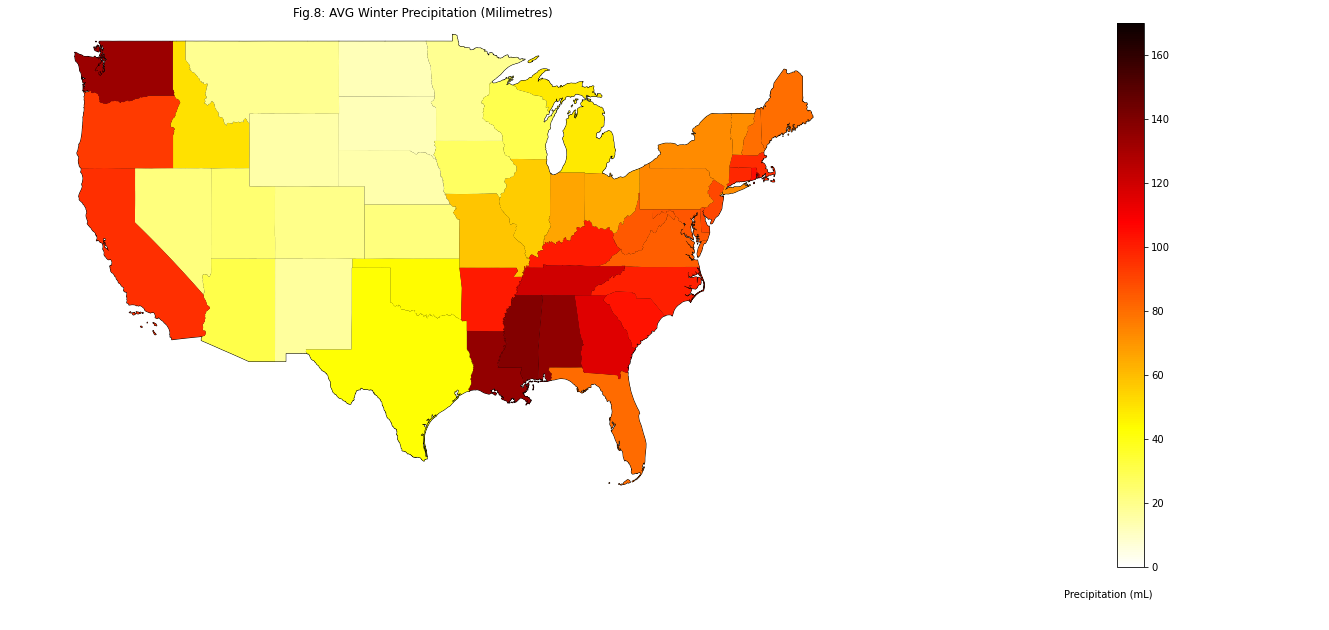

In [46]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url =  "https://www.currentresults.com/Weather/US/average-state-precipitation-in-winter.php"
response = requests.get(url) #get content
soup = BeautifulSoup(response.content)


# The data lies in 2 seperate tables so I must scrape each table and combine them in my dataframe
data_table = soup.find_all('table', )[0]
all_values = data_table.find_all('tr')

data_table1 = soup.find_all('table', )[1]
all_values1 = data_table1.find_all('tr')


#create dataframe
percipitation = pd.DataFrame(columns = ["State" , "Precipitation"])


#Run through both tables but append to a signle dataframe with the same counter
i=0
for row in all_values[1:]:
    values = row.find_all('td')
    State = values[0].text
    ml = float(values[2].text)
    percipitation.loc[i] = [State,ml]
    i=i+1
for row in all_values1[1:]:
    values = row.find_all('td')
    State = values[0].text
    ml = float(values[2].text)
    percipitation.loc[i] = [State,ml]
    i=i+1

#merge scraped data frame to map data frame
finaldata = state_df.merge(percipitation,  left_on="Province_State", right_on="State")

#plot percipitation data usiinfinal merged daaset
#plot map of USA
fig, gax = plt.subplots(figsize=(100, 10))
s_df.plot(ax=gax, edgecolor='black', color='white')

#scale to better fit map
gax.set_xlim(-130, -65)
gax.set_ylim(20, 50)

#label map
gax.set_title('Fig.8: AVG Winter Precipitation (Milimetres)')

p = finaldata.plot(ax=gax, column='Precipitation', legend=True, cmap='hot_r',vmin=0, vmax=170 )

gax.annotate('Precipitation (mL)',xy=(0.80, 0.05),  xycoords='figure fraction')
plt.axis('off')


A preliminary glance at this graph appears to show little simmilarities to the death rate maps. This is a strong indicator that there is litle to no relation between percipitation and death rate. In fact percipitation seems to be localize to costal reigons.

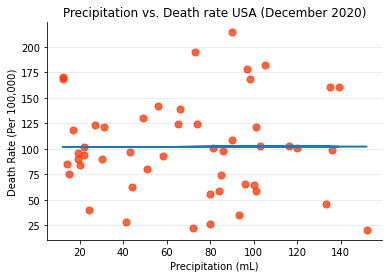

In [47]:
#Make scatter plot of deaths and scraped variable( percipitation)
ax = plt.subplot(111)
dat= finaldata[["Precipitation", "deaths/100,000" ]]
x = finaldata["Precipitation"]
y= finaldata["deaths/100,000"]
m, b = np.polyfit(x,y, 1)

dat.plot.scatter(x = "Precipitation",
                y = "deaths/100,000",
                s = 50,
                title = "Precipitation vs. Death rate USA (December 2020)",
                xlabel = "Precipitation (mL)",
                ylabel = "Death Rate (Per 100,000)",
                alpha=0.75,
                color='#FF3300', ax= ax).grid(axis='y',color = "b", alpha=0.1)
plt.plot(x, m*x + b)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Looking at the scatter plot it is evident that there is no relationship between percipitation and deathrate. The lack of relation is not a bad thing, it lets us know to not include it as a metric of climate for furter examination. 

### New-Merged Data/Plots
The source of this data set is KFF (Kaiser Family Foundation) 2019. This data is about percentage of state population WITHOUT health insurance. 

In [48]:
#merge new data to existing dataset
datanew = pd.read_csv("raw_data.csv")
finaldat = finaldata.merge(datanew,  left_on="Province_State", right_on="Location")

(-130.0, -65.0, 20.0, 50.0)

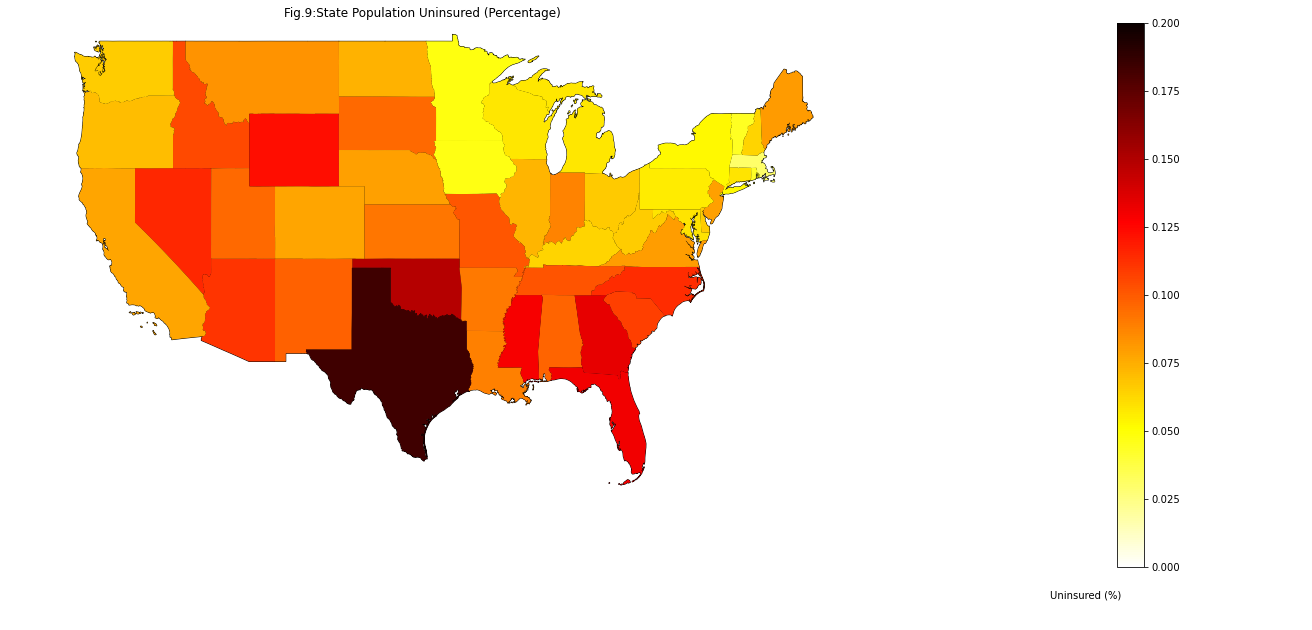

In [49]:
#plot percipitation data usiinfinal merged daaset
#plot map of USA
fig, gax = plt.subplots(figsize=(100, 10))
s_df.plot(ax=gax, edgecolor='black', color='white')

#scale to better fit map
gax.set_xlim(-130, -65)
gax.set_ylim(20, 50)

#label map
gax.set_title('Fig.9:State Population Uninsured (Percentage)')

p = finaldat.plot(ax=gax, column='Uninsured', legend=True, cmap='hot_r',vmin=0, vmax=0.2 )

gax.annotate('Uninsured (%)',xy=(0.80, 0.05),  xycoords='figure fraction')
plt.axis('off')

At first glance the percentage uninsured seems to be opposite to covid death rates. This maay imply a negative corralation between the 2 variables. Uninsured percentage genrally varies between 5 and 10% with some outlier states also visible.  

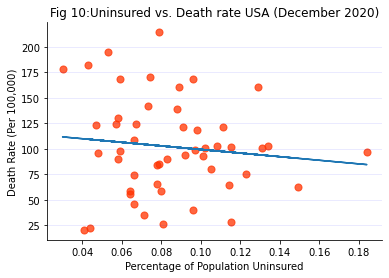

In [50]:
#Make scatter plot of deaths and scraped variable( percipitation)
ax = plt.subplot(111)
dat= finaldat[["Uninsured", "deaths/100,000" ]]
x = finaldat["Uninsured"]
y= finaldat["deaths/100,000"]
m, b = np.polyfit(x,y, 1)

dat.plot.scatter(x = "Uninsured",
                y = "deaths/100,000",
                s = 50,
                title = "Fig 10:Uninsured vs. Death rate USA (December 2020)",
                xlabel = "Percentage of Population Uninsured",
                ylabel = "Death Rate (Per 100,000)",
                alpha=0.75,
                color='#FF3300', ax= ax).grid(axis='y',color = "b", alpha=0.1)
plt.plot(x, m*x + b)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

As expected from the map, there appears to be a negative corralation between percentage of population uninsured and covid death rate. This would make sense as lack of health insurance would make individuals less likely to seek medical help for mid syptoms. 

___
### Conclusion
In conlcusion the third and final instalment of this project gathered andmerged data from both webscraping and other data sources. The webscaped data was of state percipitation averages in winther but seemed to have no corralation to the corona virus edath rate. On the other hand, the data accesed from KFF about unsinsure population perstate seemed to have a negative corralation worth looking into further for further analysis.  
_____

### References
Health insurance coverage of the total population. (2020, October 23), from <br>https://www.kff.org/other/state-indicator/total-population/currentTimeframe=0&amp;sortModel=%7B%22colId%22%3A%22Location%22%2C%22sort%22%3A%22asc%22%7D
<br>Mecenas, P., Da Rosa Moreira Bastos, R. T., Rosário Vallinoto, A. C., &amp; Normando, D. (2020). Effects of temperature and <br>humidity on the spread of covid-19: A systematic review. doi:10.1101/2020.04.14.20064923
<br> National Centers for Environmental Information (2020)
<br> US Census Bureau (2020)


___

# Final  Project


### Introduction
There have been studies that have linked differences in climate at a global level to the spead and deaths caused by corona (Mecenas et. al, 2020). I was very intrested in seeing if such a link between a metric of climate and a metric for deaths/spread could be established at a state level. In this paper I go further to investigate the link between climate and Corona Virus deaths, to get a better understanding on if the diffence in death rate is something that is out of human control (temperature) or if it is something that we can curb with poilcies ect (would be the case if no statistically significant result are returned for temeratures effect on deathrates). This paper builds on all previous projects using OLS and Regression Trees to see if there is a linear or nonlinear causal relationship between our variables of intrest and the state covid deathrates. 

### Regression  

In parts 1,2 and, 3 I analyzed multiple explanitory variables and thier links to the Output variable, State Covid Deaths per 100,000. The X variable of greatest intest for the paper was temperature while other variables analyzed where in hopes of capturing exogenous variables/variation. I think the economic link between the Y variable and the main X variable (temperature) is non linear (it is linkely a more complex relation or the map data would reveal more simmilarities). 
<br>
My X's for regression (multiple and regular) are Mean state temperature in december ($X_1$),  State political Affiliation ($X_2$) and, Percentage of population uninsured ($X_3$). I think these X's should be in the regression as they capture the main variable of intrest (Temperature) or control vor exogenous variation (party affiliation and uninsured). Also i would really like to see the effects on percetage of uninsured on covid death rates as it may have great implication for the push for universal health care in America. I think $X_1$ would explain $Y$ because there have been studies linking climate conditions to covid, $X_2$ because america is bipartisan and they both have different views on how the pademic should be handeled. Finnally $X_3$ UI think when higher percentage of population is uninsures, access to qualified healthcare is difficult and therefore more death may arise due to covid (preventable deaths if they were insured). 

#### OLS Results

In [51]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

#### REGRESSION 1 ALL Variables ####

Final_data = finaldat.merge(color, left_on="STUSPS", right_on="State")
Final_data['const'] = 1
#Final_data.columns
X1 = ['const','Avg ° C','Uninsured','coded']
X2 = ['const','Avg ° C']
X3 = ['const','Avg ° C','Uninsured']
X4 = ['const','Uninsured']
X5 = ['const','coded']


In [52]:
#### REGRESSION 1 ALL Variables ####
reg1 = sm.OLS(Final_data['deaths/100,000'], Final_data[X1]).fit()
reg2 = sm.OLS(Final_data['deaths/100,000'], Final_data[X2]).fit()
reg3 = sm.OLS(Final_data['deaths/100,000'], Final_data[X3]).fit()
reg4 = sm.OLS(Final_data['deaths/100,000'], Final_data[X4]).fit()
reg5 = sm.OLS(Final_data['deaths/100,000'], Final_data[X5]).fit()

#Get Model stat sig values
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

#Output table reg
results_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4',
                                         'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Avg ° C',
                                             'coded',
                                             'Uninsured'])

results_table.add_title('Table 1 - OLS Regressions')


print(results_table)


                    Table 1 - OLS Regressions
                  Model 1   Model 2   Model 3   Model 4   Model 5 
------------------------------------------------------------------
const            119.55*** 103.68*** 118.01*** 119.05*** 101.25***
                 (28.92)   (6.70)    (20.80)   (19.57)   (9.57)   
Avg ° C          -0.16     -0.43     -0.17                        
                 (1.08)    (0.99)    (1.06)                       
coded            -1.23                                   4.50     
                 (15.84)                                 (13.40)  
Uninsured        -180.85             -170.04   -182.84            
                 (274.16)            (233.47)  (217.18)           
R-squared        0.02      0.00      0.02      0.01      0.00     
R-squared Adj.   -0.05     -0.02     -0.03     -0.01     -0.02    
R-squared        0.02      0.00      0.02      0.01      0.00     
No. observations 49        49        49        49        49       
Standard errors 

In [53]:
print('Mean Squared Error Model 1:', reg1.mse_total)


Mean Squared Error Model 1: 2157.982521598503


I Did multiple regression on the variables $X_1$ $X_2$ and  $X_3$ aswell as regressing them individually. As You can see from the OLS regression table (__TABLE 1__) None of these preditors do a good job of explaining the variabtion in stat deaths per 100,000 (no significant P values). This is not necissarily a bad thing. This means we can conclude based on the data we have, there is not enough information to regect the null (that these pretictors can explain deaths per 100,000). In laymens terms this table shows us that the data may suggest that there is no tatistically significant link between our $X$ variables and our $Y$ Variable. This Is further proven by thehe VERY LOW R-squared and adjusted R-squared values. Showing litte to no correlaion between the depantant variabel and the independant variabes.
<br>
#### Choice of regression


I chose to run these regression for for the following reasons. The first regression using all three variavles i used to see in temprature of uninsured percentage had an effect on covid deaths while controling for exogenous variation in state affiliation (red state or blue state). the second regression i ran to see if there was any relationship between temp in general. and then the 2 variables of intrest without controlling for state politicla affiliation. Essentially the regression i chose were to see if corna virus deaths could be a tribbuted to temperature or uninsured percentage while controlling for other factors. I chose p-values of each variable and R-squared a as my specification method. I chose these because they are independant of the the number of variables used and give a good grasp variable preformance/importance. Adjusted R squared works well as i have multiple regressors so i dont want the number of variables to affect precieved  preformance. I got unadjusted R-squared of 0.05 or less for all models. This means my models are abdolute garbage and the variables have nothing to do with the y variable, however, it is too late do do anything about this so we are just gonna roll with it and hope the TA grading this is an understanding person. To evaluate my Model as a whole is used MSE. I got an MSE of 2157.98, this is further validation that the model as a whole is very bad and that its has no predictive acuracy. Ive nver seen an mse so high before, in fact im still convinced that ive done the code wrong.

#### Takeaways OLS REG
From my regression results i understand that temperature, state affiliation and percentage of population uninsured are bad predictors of deathrates in a state. Though these results may appear to have a negative connotation bad results can stillbe learned from. Since temperature at a state level has very little to do with state deathrate, it means that interstate variation in death rate is largely due to consumer sentiments on the virus and state legislature (not determined by nature). This means that states have controll on how to mitiage deathrates and i suggest further inferential studies be done in this topic.

### ML RANDOM FORESTS


The objective function is to minimize mse at the end of each node based on the split.  The regularization parameters are like max tree depgth and min sample leaf. Changing these can help you control overfitting. If for example wee have a tree that is too deep. It means it over fir the training data and therefore its test mse will be hich higher. 

In [54]:
from sklearn import tree
from sklearn import metrics
rf = ['Avg ° C','Uninsured']
X = Final_data[rf]
Y = Final_data['deaths/100,000']
covid_tree = tree.DecisionTreeRegressor(max_depth=10).fit(X,Y)
y_prediction = covid_tree.predict(X)
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_prediction))

Mean Squared Error: 323.2615211568903


With the decision tree it is evident the Random forest regrssion runs better as the model preformance slightly beats out the linear model. This is seen as mse is 323 conpared to the 2158 in linear regression. 

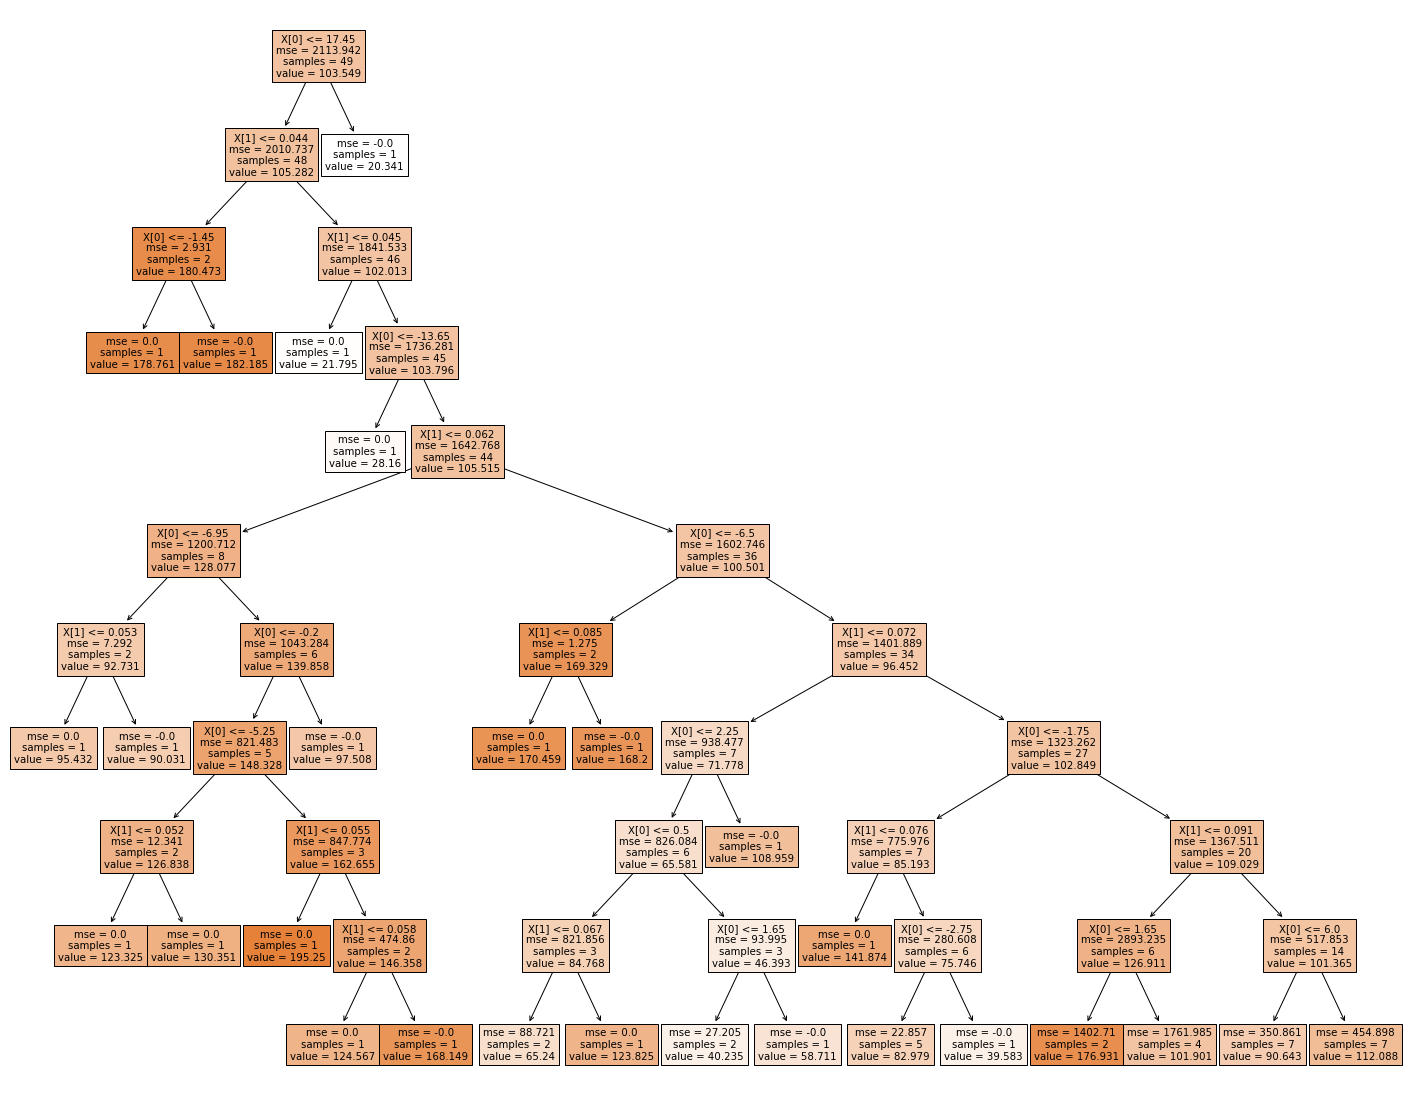

In [55]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(covid_tree,  filled=True)

As you can see the variables for the split are ALWAYS either X[0] which is the constant term or on occasion x[1] which is the temperature term. Regarless the tree has a max depth of 10 and preforms very poorly with a large MSE. From this model i was able to more clearly see that the variables of intrast are not relavant expecially political affiliation and percentage of population uninsured. Also the lower mse on the regression tree is a likley indicator that the relationship (if any exist) would be highly non linear. 


### Conclusion and future Work
In this paper we attempted to find both a linear (OLS REG) and non linear(TREES REG) to see if temperature and percentage of people uninsured in a state had an effect on the death rate of the state. When conducting both the OLD and Regression Trees model, it was evident from the absurdly high MSE's that these models were poor at finding any causal relationship and the high p values and low R squared values in the OLS regression are indicative that these predictors namely temperature political affiliation and percentage of population uninsured had little to no ability to explain statewide variation in Covid death rates in december. The lack of results is still a result as, if temperature cannot explain the variation then then variation between states must lie with indivudual sentimatent and state policies regarding the pandemic. Future work may want to look at the inferential links between these factors as the paper finds there is likely no evidence supporting the claim that temperature has an effect on covid deaths at the state level. 